In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## NBA Players1996-2019

In [2]:
df=pd.read_csv('C:/Users/jason/downloads/all_seasons.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [5]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [6]:
df.describe(include = 'all')

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
count,12305.000000,12305,12305,12305.000000,12305.000000,12305.000000,12305,12305,12305,12305,...,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305
unique,NaN,2463,36,NaN,NaN,NaN,347,82,47,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
top,NaN,Vince Carter,CLE,NaN,NaN,NaN,None,USA,Undrafted,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
freq,NaN,22,433,NaN,NaN,NaN,1789,10308,2224,7071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605
mean,6152.000000,NaN,NaN,27.084518,200.611602,100.369926,NaN,NaN,NaN,NaN,...,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358,NaN
std,3552.291866,NaN,NaN,4.335868,9.146321,12.477150,NaN,NaN,NaN,NaN,...,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483,NaN
min,0.000000,NaN,NaN,18.000000,160.020000,60.327736,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3076.000000,NaN,NaN,24.000000,193.040000,90.718400,NaN,NaN,NaN,NaN,...,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000,NaN
50%,6152.000000,NaN,NaN,26.000000,200.660000,99.790240,NaN,NaN,NaN,NaN,...,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000,NaN
75%,9228.000000,NaN,NaN,30.000000,208.280000,108.862080,NaN,NaN,NaN,NaN,...,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000,NaN


# 缺失值檢查&處理

In [88]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                   Total  Percent
is_American            0      0.0
drafted                0      0.0
player_name            0      0.0
team_abbreviation      0      0.0
age                    0      0.0
player_height          0      0.0
player_weight          0      0.0
college                0      0.0
country                0      0.0
draft_year             0      0.0
draft_round            0      0.0
draft_number           0      0.0
gp                     0      0.0
pts                    0      0.0
reb                    0      0.0
ast                    0      0.0
net_rating             0      0.0
oreb_pct               0      0.0
dreb_pct               0      0.0
usg_pct                0      0.0
ts_pct                 0      0.0
ast_pct                0      0.0
season                 0      0.0
Unnamed: 0             0      0.0


## 新增欄位:是否經過選秀

In [72]:
drafted=[]
for i in df['draft_year']:
    if i=='Undrafted':
        drafted.append('No')
    else:
        drafted.append('Yes')

In [73]:
drftedstat=pd.DataFrame(drafted)
drafted_stats=drftedstat.rename(columns={0:'drafted'})
drafted_stats['drafted'].value_counts()

Yes    10081
No      2224
Name: drafted, dtype: int64

In [74]:
df = pd.concat([df,drafted_stats],axis=1) 

## 新增欄位:是否為美國本土球員

In [75]:
is_american=[]
for i in df['country']:
    if i=='USA':
        is_american.append('Yes')
    else:
        is_american.append('No')

In [76]:
usa=pd.DataFrame(is_american)
isamerican=usa.rename(columns={0:'is_American'})
isamerican['is_American'].value_counts()

Yes    10308
No      1997
Name: is_American, dtype: int64

In [77]:
df = pd.concat([df,isamerican],axis=1) 

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

## 把以前的隊伍名稱改成現在對應的隊伍名稱

In [50]:
df['team_abbreviation'].value_counts()

CLE    433
TOR    428
MIA    426
LAC    424
DAL    422
WAS    422
ATL    421
PHI    420
HOU    418
SAS    413
DEN    412
LAL    411
ORL    411
IND    410
NYK    410
MIL    409
GSW    409
BOS    407
POR    407
CHI    406
DET    400
MIN    399
PHX    399
SAC    398
UTA    397
MEM    352
CHA    288
NJN    257
OKC    239
SEA    182
BKN    180
NOP    159
NOH    143
CHH     89
VAN     72
NOK     32
Name: team_abbreviation, dtype: int64

In [51]:
df = df.replace({'team_abbreviation' : {'NJN':'BKN', 'SEA':'OKC', 'NOH':'NOP','CHH':'CHA','VAN':'MEM','NOK':'NOP'}})
df['team_abbreviation'].value_counts()

BKN    437
CLE    433
TOR    428
MIA    426
LAC    424
MEM    424
DAL    422
WAS    422
OKC    421
ATL    421
PHI    420
HOU    418
SAS    413
DEN    412
ORL    411
LAL    411
IND    410
NYK    410
GSW    409
MIL    409
BOS    407
POR    407
CHI    406
DET    400
MIN    399
PHX    399
SAC    398
UTA    397
CHA    377
NOP    334
Name: team_abbreviation, dtype: int64

# 資料分析

### Heat Map

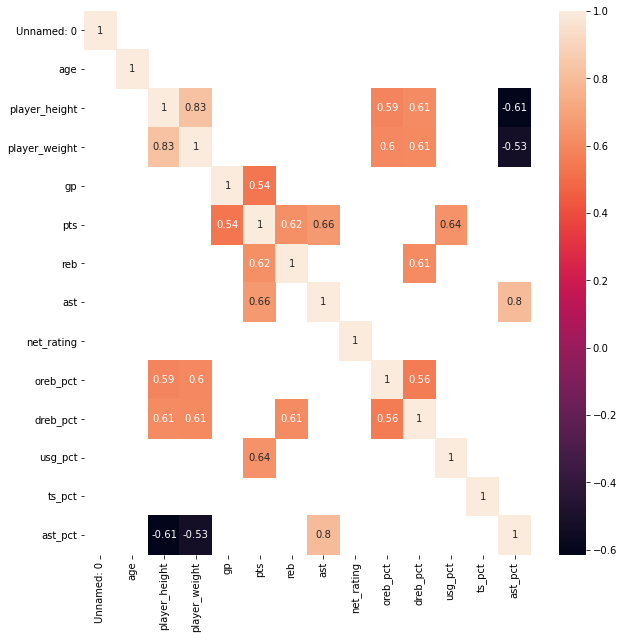

In [171]:
plt.figure(figsize=(10,10))
corr = df.corr()
corr = corr[abs(corr) > 0.5]
sns.heatmap(corr, annot=True)
#plt.savefig('C:/Users/jason/Python-learning/heatmap.png')

### 聯盟每季球員人數長條圖

In [17]:
season_v = df.groupby("season")
season_v.size()

season
1996-97    441
1997-98    439
1998-99    439
1999-00    438
2000-01    441
2001-02    440
2002-03    428
2003-04    442
2004-05    464
2005-06    458
2006-07    458
2007-08    451
2008-09    445
2009-10    442
2010-11    452
2011-12    478
2012-13    469
2013-14    482
2014-15    492
2015-16    476
2016-17    486
2017-18    540
2018-19    530
2019-20    529
2020-21    540
2021-22    605
dtype: int64

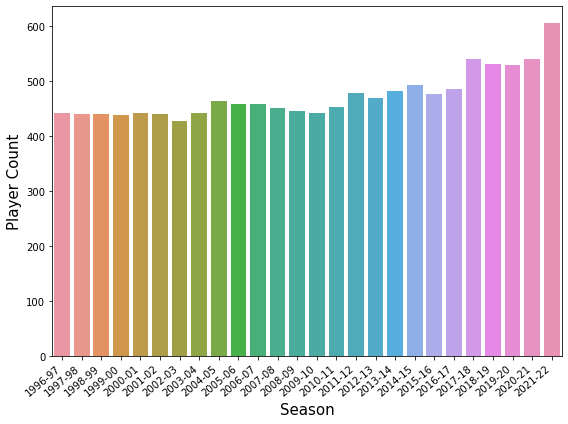

In [85]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "season", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Season',fontsize=15)
plt.ylabel('Player Count',fontsize=15)
plt.tight_layout()
plt.savefig('C:/Users/jason/Python-learning/聯盟每季球員總數.png')
plt.show()

### 各隊人數(總計)

In [35]:
team = df.groupby("team_abbreviation")
team.size()

team_abbreviation
ATL    421
BKN    180
BOS    407
CHA    288
CHH     89
CHI    406
CLE    433
DAL    422
DEN    412
DET    400
GSW    409
HOU    418
IND    410
LAC    424
LAL    411
MEM    352
MIA    426
MIL    409
MIN    399
NJN    257
NOH    143
NOK     32
NOP    159
NYK    410
OKC    239
ORL    411
PHI    420
PHX    399
POR    407
SAC    398
SAS    413
SEA    182
TOR    428
UTA    397
VAN     72
WAS    422
dtype: int64

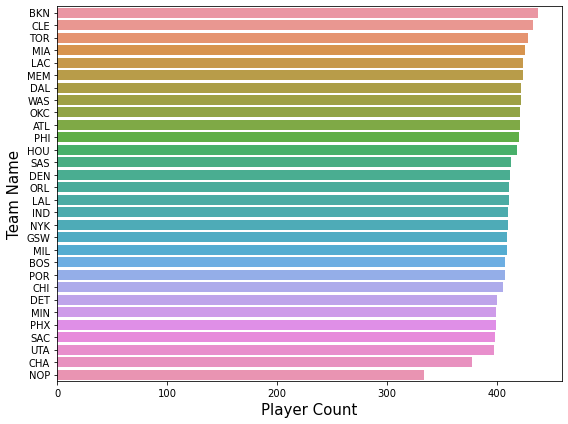

In [86]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(y=df['team_abbreviation'],data=df,order=df['team_abbreviation'].value_counts().index)
plt.xlabel('Player Count',fontsize=15)
plt.ylabel('Team Name',fontsize=15)
plt.tight_layout()
plt.savefig('C:/Users/jason/Python-learning/1996-2021各隊總人數.png')
plt.show()

### 每季各隊平均球員身高、體重、年齡

In [77]:
avg_height = pd.DataFrame(df.groupby(['team_abbreviation', 'season'],as_index=False)['player_height'].mean())
avg_height

,team_abbreviation,season,player_height
0,ATL,1996-97,203.797647
1,ATL,1997-98,199.231250
2,ATL,1998-99,199.571429
3,ATL,1999-00,201.246154
4,ATL,2000-01,200.025000
...,...,...,...
767,WAS,2017-18,201.168000
768,WAS,2018-19,201.328421
769,WAS,2019-20,197.878095
770,WAS,2020-21,200.095556


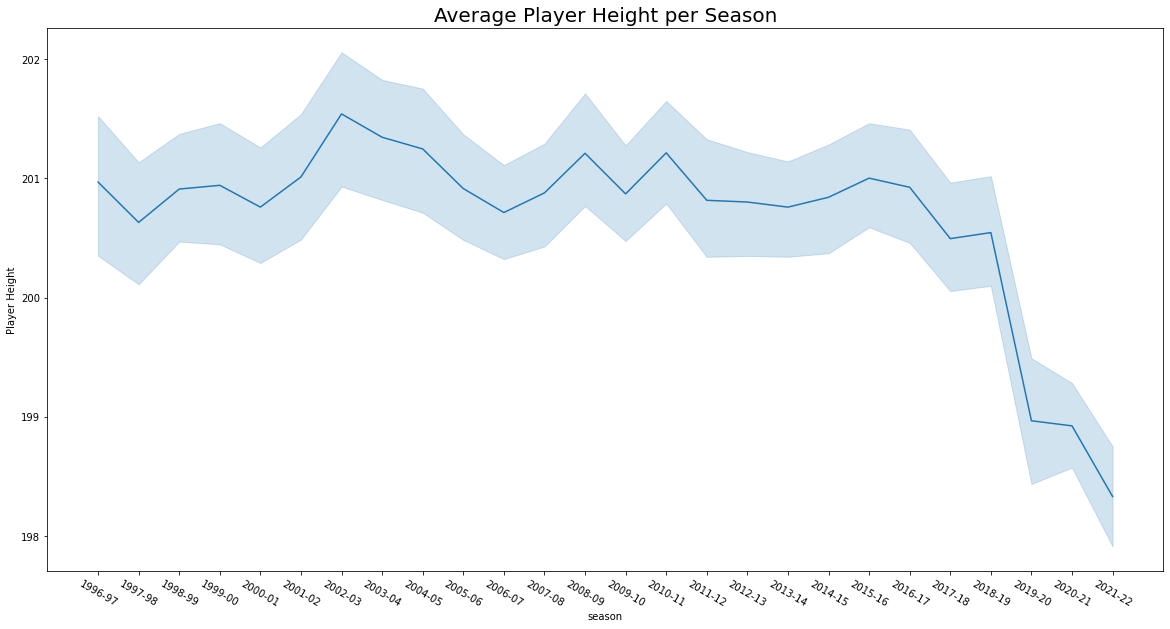

In [89]:
plt.figure(figsize=(20,10))
sns.lineplot('season', 'player_height', data=avg_height)
plt.xticks(rotation=-30)
plt.ylabel('Player Height')
plt.title('Average Player Height per Season', fontsize=20)
plt.savefig('C:/Users/jason/Python-learning/每季各隊平均球員身高.png')
plt.show()

In [91]:
avg_weight = pd.DataFrame(df.groupby(['team_abbreviation', 'season'],as_index=False)['player_weight'].mean())
avg_weight

,team_abbreviation,season,player_weight
0,ATL,1996-97,103.098793
1,ATL,1997-98,99.166551
2,ATL,1998-99,100.470628
3,ATL,1999-00,100.662532
4,ATL,2000-01,97.890823
...,...,...,...
767,WAS,2017-18,97.945633
768,WAS,2018-19,99.933480
769,WAS,2019-20,96.723094
770,WAS,2020-21,97.749076


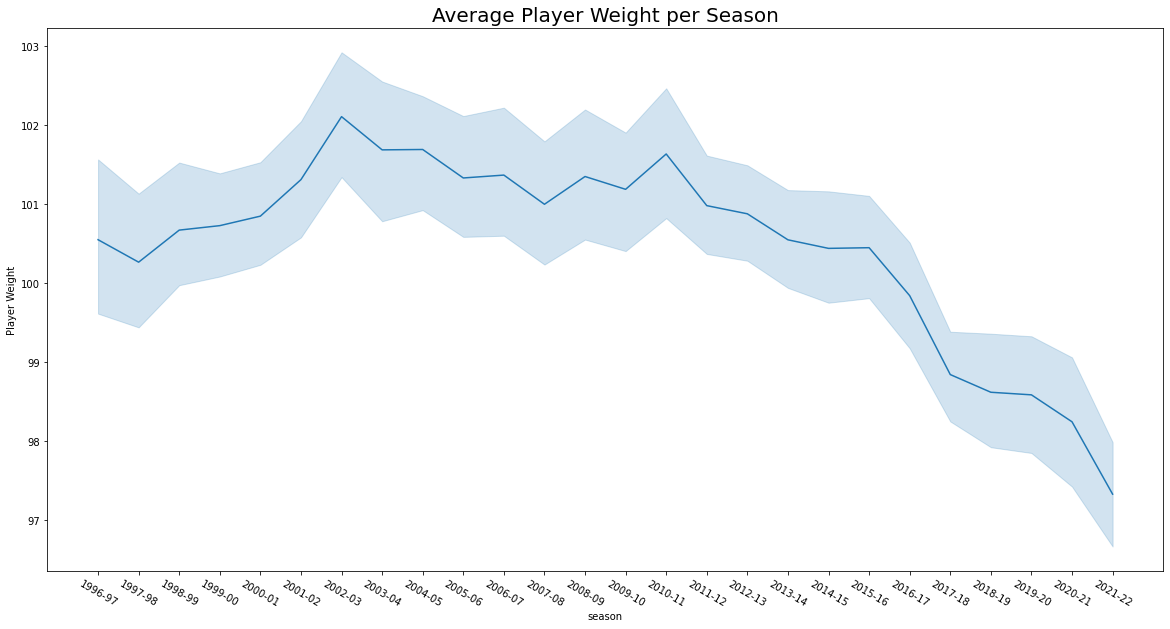

In [92]:
plt.figure(figsize=(20,10))
sns.lineplot('season', 'player_weight', data=avg_weight)
plt.xticks(rotation=-30)
plt.ylabel('Player Weight')
plt.title('Average Player Weight per Season', fontsize=20)
plt.savefig('C:/Users/jason/Python-learning/每季各隊平均球員體重.png')
plt.show()

In [93]:
avg_age = pd.DataFrame(df.groupby(['team_abbreviation', 'season'],as_index=False)['age'].mean())
avg_age

,team_abbreviation,season,age
0,ATL,1996-97,27.529412
1,ATL,1997-98,28.250000
2,ATL,1998-99,28.500000
3,ATL,1999-00,26.692308
4,ATL,2000-01,26.187500
...,...,...,...
767,WAS,2017-18,27.600000
768,WAS,2018-19,26.894737
769,WAS,2019-20,25.619048
770,WAS,2020-21,26.000000


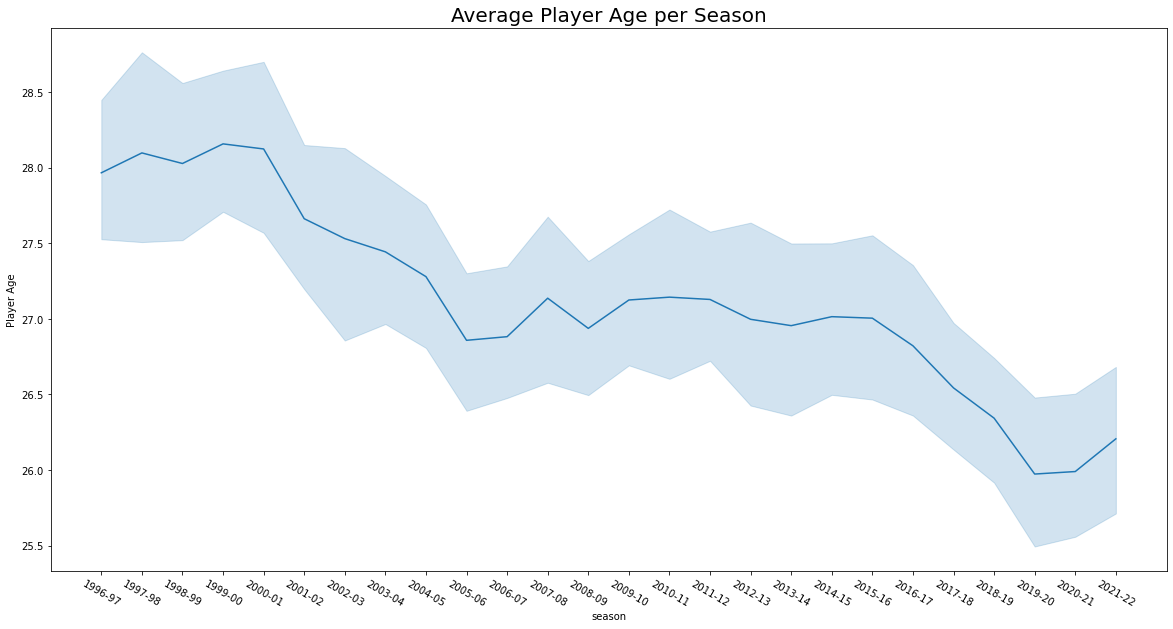

In [94]:
plt.figure(figsize=(20,10))
sns.lineplot('season', 'age', data=avg_age)
plt.xticks(rotation=-30)
plt.ylabel('Player Age')
plt.title('Average Player Age per Season', fontsize=20)
plt.savefig('C:/Users/jason/Python-learning/每季各隊平均球員年齡.png')
plt.show()

## 建一個只有單一球員姓名的df

In [80]:
players_unique = df.drop_duplicates(subset='player_name')
players_unique

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,is_American
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,Yes,Yes
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,Yes,Yes
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,Yes,Yes
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,Yes,Yes
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,12285,McKinley Wright IV,MIN,23.0,180.34,87.089664,Colorado,USA,Undrafted,Undrafted,...,0.6,-25.8,0.000,0.000,0.082,0.833,0.231,2021-22,No,Yes
12291,12291,Matt Ryan,BOS,25.0,200.66,97.522280,Tennessee-Chattanooga,USA,Undrafted,Undrafted,...,0.0,25.0,0.000,0.000,0.357,0.300,0.000,2021-22,No,Yes
12299,12299,Marko Simonovic,CHI,22.0,210.82,99.790240,None,Montenegro,2020,2,...,0.0,1.2,0.122,0.119,0.247,0.428,0.000,2021-22,Yes,No
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22,No,Yes


In [53]:
players_unique.to_csv('C:/Users/jason/Python-learning/players_unique.csv',index=False,encoding='utf-8')

### 各球員所屬國家、大學、賽季相關資料

In [10]:
players_unique['country'].value_counts() #跟season一起做，看每年有多少比例的非美國人

USA                    2067
Canada                   39
France                   35
Australia                19
Croatia                  15
                       ... 
US Virgin Islands         1
Angola                    1
U.S. Virgin Islands       1
Trinidad and Tobago       1
Ireland                   1
Name: country, Length: 80, dtype: int64

In [81]:
players_unique['is_American'].value_counts()

Yes    2067
No      396
Name: is_American, dtype: int64

In [82]:
players_unique['drafted'].value_counts()

Yes    1727
No      736
Name: drafted, dtype: int64

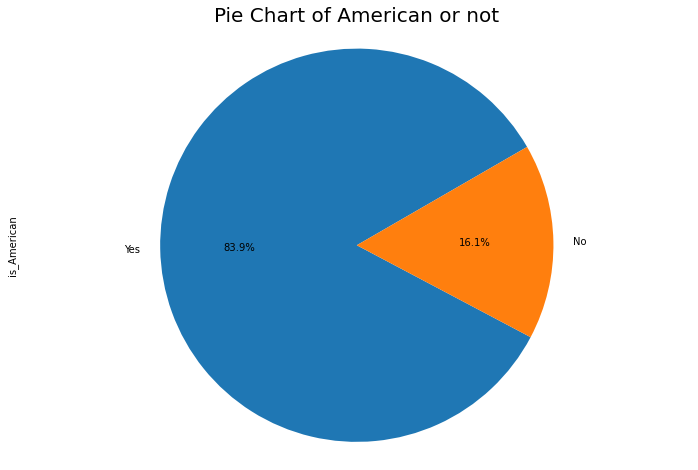

In [102]:
plt.figure(figsize = (12, 8))
pp = pd.value_counts(players_unique.is_American)
pp.plot.pie(startangle=30, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title('Pie Chart of American or not', fontsize=20)
plt.savefig('C:/Users/jason/Python-learning/球員為美國人的比例.png')
plt.show()

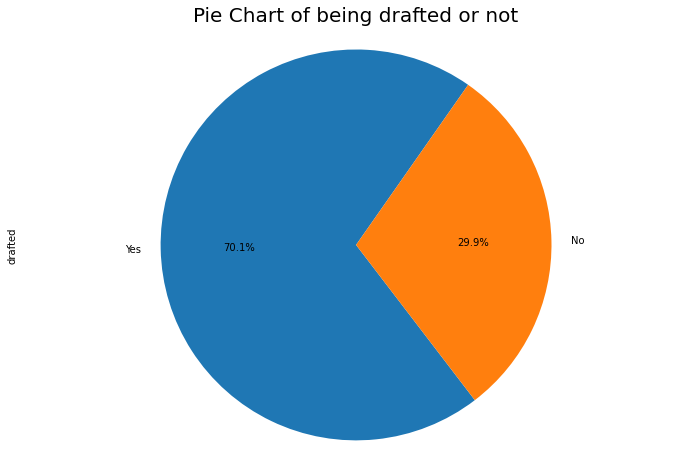

In [108]:
plt.figure(figsize = (12, 8))
pp = pd.value_counts(players_unique.drafted)
pp.plot.pie(startangle=55, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title('Pie Chart of being drafted or not', fontsize=20)
plt.savefig('C:/Users/jason/Python-learning/球員是否透過選秀加入聯盟.png')
plt.show()

In [67]:
usaplayer=players_unique[players_unique.is_American=='Yes']
non_usaplayer=players_unique[players_unique.is_American=='No']

In [176]:
players_unique['college'].value_counts() #取前十做圖

None                           345
Kentucky                        74
Duke                            60
UCLA                            50
Kansas                          50
                              ... 
Denver                           1
Indiana Purdue-Indianapolis      1
Northwestern Oklahoma            1
Morehouse                        1
Georgia Southern                 1
Name: college, Length: 327, dtype: int64

In [11]:
players_unique['draft_year'].value_counts()

Undrafted    736
2019          69
2020          60
2017          58
2018          58
2011          57
1998          57
2016          56
2012          56
2005          55
2014          54
2021          53
2006          52
2010          51
2000          50
2008          50
2009          50
2013          50
2001          49
2002          48
2007          48
1999          48
1995          47
1996          47
2004          47
1997          47
2003          47
2015          44
1994          42
1992          36
1990          32
1993          31
1988          29
1991          26
1989          23
1987          23
1985          21
1986          18
1983          10
1984           9
1981           7
1982           6
1979           2
1963           1
1978           1
1980           1
1976           1
Name: draft_year, dtype: int64

### 各隊樂透籤人數

In [18]:
players_draft = df[df['draft_year'] == df['season'].apply(lambda x: x[:4])]
lottery_picks = players_draft[players_draft.draft_number.isin(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'])]
team_lottery_picks = lottery_picks['team_abbreviation'].value_counts()

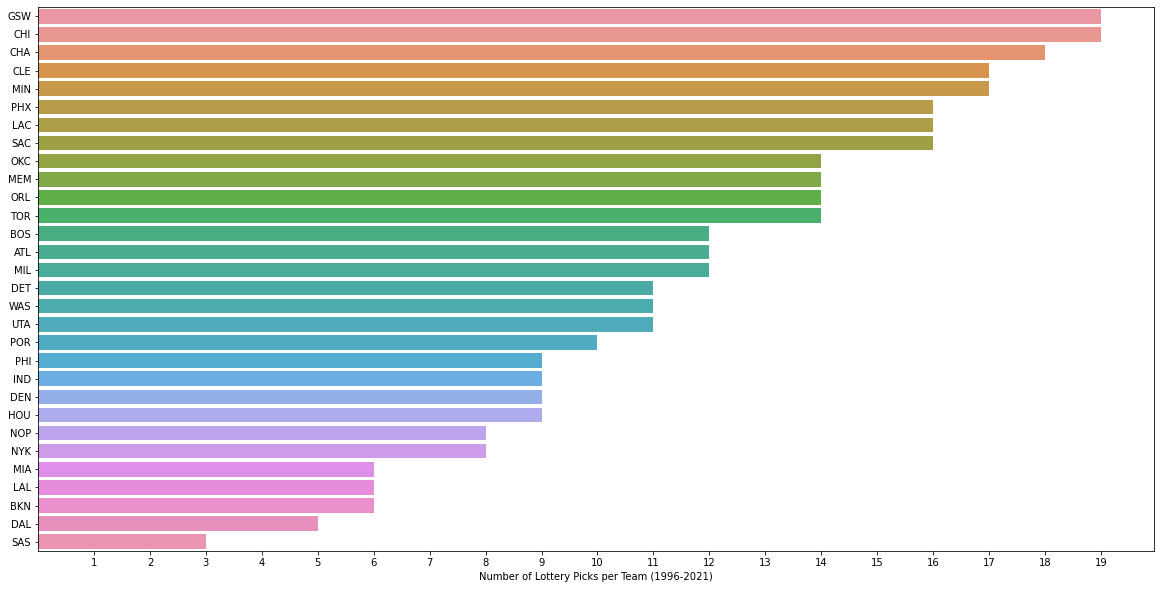

In [95]:
plt.figure(figsize=(20,10))
sns.barplot(team_lottery_picks, team_lottery_picks.index)
plt.xlabel('Number of Lottery Picks per Team (1996-2021)')
plt.xticks([i for i in range(1,20)])
plt.savefig('C:/Users/jason/Python-learning/各隊樂透籤人數.png')
plt.show()

### 首輪、次輪、落選球員是否為美國球員的比例

In [64]:
first_round_picks = players_draft[players_draft.draft_round == '1']
countries = first_round_picks.country.unique()
print('NBA First Round Picks Nationalities')
print()
for i in range(len(countries)):
    print(f'{countries[i]: <35}', end='')

NBA First Round Picks Nationalities

USA                                Ukraine                            Canada                             US Virgin Islands                  France                             St. Vincent & Grenadines           Georgia                            Nigeria                            Slovenia                           Dominican Republic                 Germany                            Turkey                             Greece                             Croatia                            Senegal                            Spain                              Serbia                             Haiti                              Czech Republic                     China                              Brazil                             Serbia and Montenegro              Montenegro                         Russia                             Latvia                             United Kingdom                     Australia                          Lithuania         

In [28]:
second_round_picks = players_draft[players_draft.draft_round == '2']
countries2 = second_round_picks.country.unique()
print('NBA Second Round Picks Nationalities')
print()
for i in range(len(countries2)):
    print(f'{countries2[i]: <35}', end='')

NBA Second Round Picks Nationalities

USA                                Slovenia                           Croatia                            New Zealand                        Canada                             Nigeria                            Mexico                             Finland                            Mali                               Greece                             Netherlands                        Scotland                           Poland                             Georgia                            Brazil                             South Korea                        Puerto Rico                        Senegal                            France                             Lithuania                          Ukraine                            Gabon                              Australia                          Cameroon                           Sweden                             Ghana                              Germany                            Latvia           

In [31]:
undrafted = players_draft[players_draft.draft_round == 'Undrafted']
countries3 = undrafted.country.unique()
print('NBA Undrafted Nationalities')
print()
for i in range(len(countries3)):
    print(f'{countries3[i]: <35}', end='')

NBA Undrafted Nationalities

USA                                

In [32]:
non_usa = list(countries)[1:]
usa_or_other = first_round_picks['country'].replace(non_usa, 'Other')
first_round_picks.loc[:,'country'] = usa_or_other
first_round_picks.head()

C:\Users\jason\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
21,21,Erick Dampier,IND,21.0,210.82,120.201880,Mississippi State,USA,1996,1,...,5.1,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996-97
30,30,Derek Fisher,LAL,22.0,185.42,90.718400,Arkansas-Little Rock,USA,1996,1,...,3.9,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996-97
78,78,Jermaine O'Neal,POR,18.0,210.82,102.511792,None,USA,1996,1,...,4.1,2.8,0.2,1.3,0.099,0.198,0.199,0.494,0.030,1996-97
131,131,Brian Evans,ORL,23.0,203.20,99.790240,Indiana,USA,1996,1,...,1.4,0.6,0.5,-12.5,0.017,0.121,0.168,0.455,0.194,1996-97
147,147,Allen Iverson,PHI,22.0,182.88,74.842680,Georgetown,USA,1996,1,...,23.5,4.1,7.5,-7.0,0.040,0.072,0.284,0.513,0.320,1996-97


In [53]:
def make_label(pct, allvalues):
    actual = round(pct/100 * np.sum(allvalues))
    return f"{pct:.1f}%\n{actual} players"

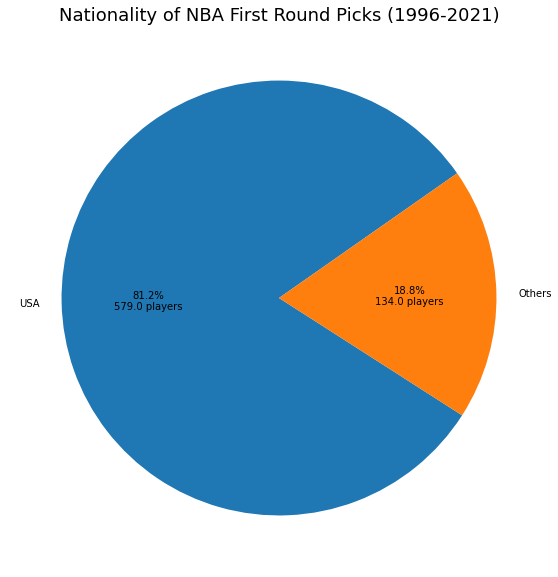

In [66]:
plt.figure(figsize = (15,10))
plt.pie(usa_or_other.value_counts(), labels= ['USA', 'Others'],startangle=35,
        autopct= lambda pct: make_label(pct, usa_or_other.value_counts()))
plt.title('Nationality of NBA First Round Picks (1996-2021)', fontsize=18)
plt.savefig('C:/Users/jason/Python-learning/首輪球員國籍.png')
plt.show()

In [52]:
non_usa2 = list(countries2)[1:]
usa_or_other2 = second_round_picks['country'].replace(non_usa2, 'Other')
second_round_picks.loc[:,'country'] = usa_or_other2
second_round_picks.head()

C:\Users\jason\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
68,68,Jamie Feick,SAS,22.0,203.20,115.66596,Michigan State,USA,1996,2,...,3.7,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996-97
73,73,Jason Sasser,DAL,23.0,200.66,102.05820,Texas Tech,USA,1996,2,...,2.4,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,1996-97
77,77,Jeff McInnis,DEN,22.0,193.04,86.18248,North Carolina,USA,1996,2,...,5.0,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,1996-97
114,114,Ben Davis,PHX,24.0,205.74,108.86208,Arizona,USA,1996,2,...,1.5,1.4,0.0,-0.4,0.132,0.192,0.156,0.417,0.000,1996-97
162,162,Amal McCaskill,ORL,23.0,210.82,106.59412,Marquette,USA,1996,2,...,1.6,1.3,0.4,-15.7,0.038,0.200,0.206,0.376,0.146,1996-97


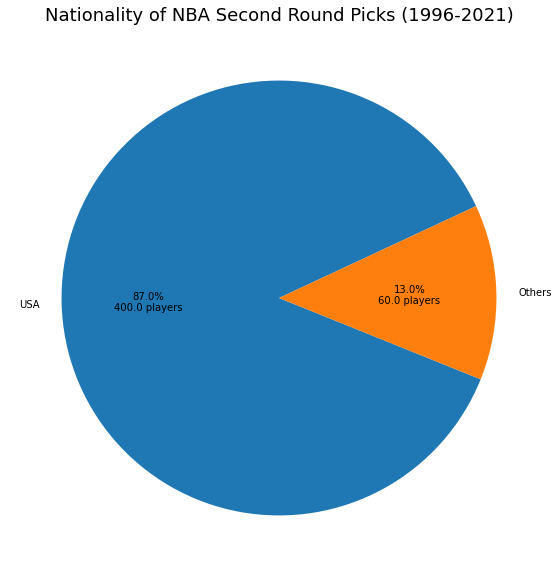

In [67]:
plt.figure(figsize = (15,10))
plt.pie(usa_or_other2.value_counts(), labels= ['USA', 'Others'],startangle=25,
        autopct= lambda pct: make_label(pct, usa_or_other2.value_counts()))
plt.title('Nationality of NBA Second Round Picks (1996-2021)', fontsize=18)
plt.savefig('C:/Users/jason/Python-learning/二輪球員國籍.png')
plt.show()

## 各隊平均出賽數

In [134]:
avg_gp = pd.DataFrame(df.groupby(['team_abbreviation', 'season'],as_index=False)['gp'].mean())
avg_gp

,team_abbreviation,season,gp
0,ATL,1996-97,46.529412
1,ATL,1997-98,49.187500
2,ATL,1998-99,36.571429
3,ATL,1999-00,60.615385
4,ATL,2000-01,50.000000
...,...,...,...
767,WAS,2017-18,58.600000
768,WAS,2018-19,42.631579
769,WAS,2019-20,38.285714
770,WAS,2020-21,44.166667


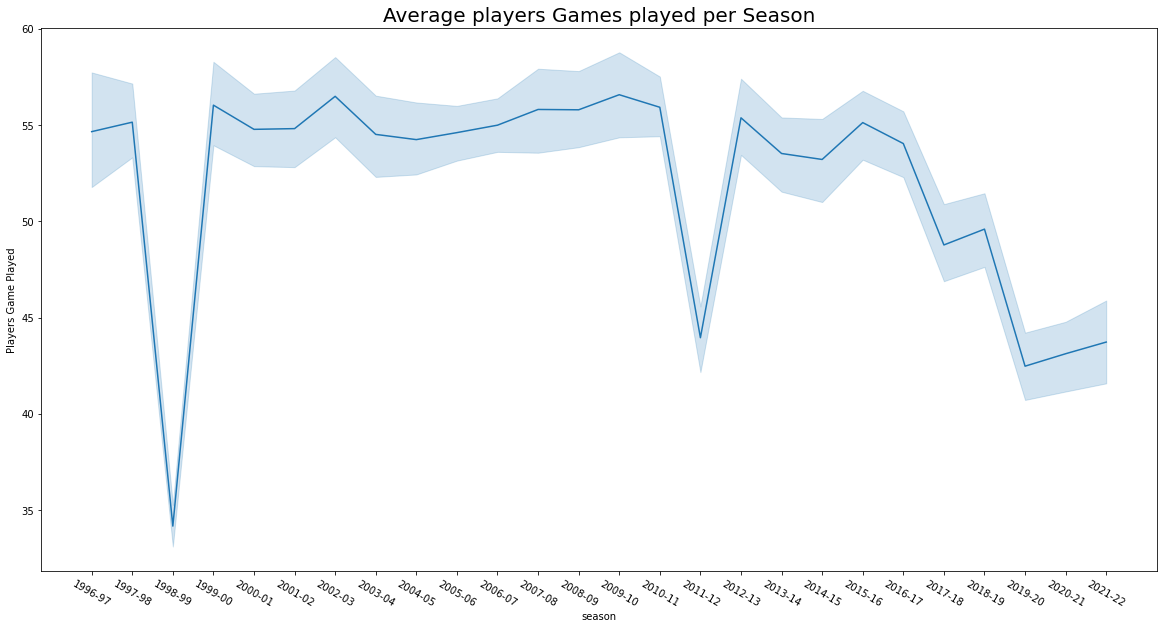

In [164]:
plt.figure(figsize=(20,10))
sns.lineplot('season', 'gp', data=avg_gp)
plt.xticks(rotation=-30)
plt.ylabel('Players Game Played')
plt.title('Average players Games played per Season', fontsize=20)
plt.savefig('C:/Users/jason/Python-learning/每季各隊球員平均出賽數.png')
plt.show()

In [156]:
avg_gp2 = pd.DataFrame(df.groupby(['player_name'],as_index=False)['gp'].mean())
avg_gp48=avg_gp2['gp'].values>=48
avg_gp2[avg_gp48]

,player_name,gp
0,A.C. Green,75.800000
5,Aaron Brooks,64.500000
6,Aaron Gordon,66.000000
10,Aaron Holiday,61.250000
12,Aaron McKie,60.636364
...,...,...
2449,Zarko Cabarkapa,50.000000
2451,Zaza Pachulia,68.625000
2457,Ziaire Williams,62.000000
2460,Zoran Planinic,49.333333


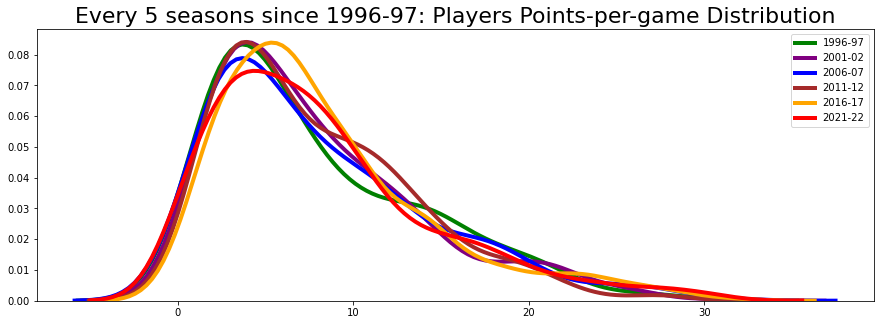

In [17]:
plt.figure(figsize=(15,5))

seasons = list(df['season'].unique())
earliest_season = seasons[0]
latest_season = seasons[-1]

sns.kdeplot(df[df['season'] =='1996-97']['pts'], color='g', label='1996-97', linewidth=4)
sns.kdeplot(df[df['season'] == '2001-02']['pts'], color='purple', label='2001-02', linewidth= 4)
sns.kdeplot(df[df['season'] == '2006-07']['pts'], color='b', label='2006-07', linewidth= 4)
sns.kdeplot(df[df['season'] == '2011-12']['pts'], color='brown', label='2011-12', linewidth= 4)
sns.kdeplot(df[df['season'] == '2016-17']['pts'], color='orange', label='2016-17', linewidth= 4)
sns.kdeplot(df[df['season'] == '2021-22']['pts'], color='r', label='2021-22', linewidth= 4)

plt.title("Every 5 seasons since 1996-97: Players Points-per-game Distribution", fontsize=22)
plt.savefig('C:/Users/jason/Python-learning/每隔5季各球員場均得分比較.png')    
plt.legend()

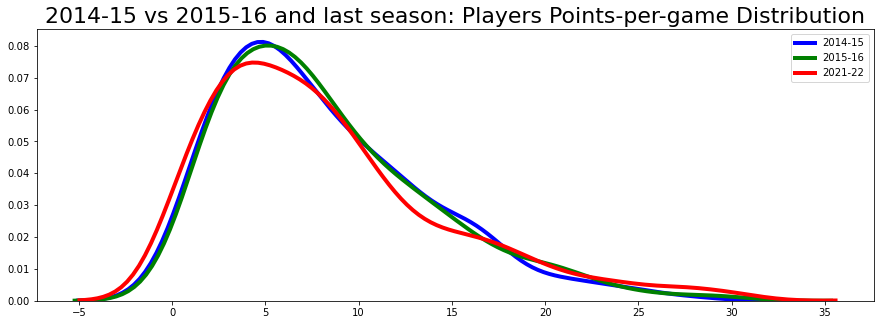

In [27]:
plt.figure(figsize=(15,5))
sns.kdeplot(df[df['season'] == '2014-15']['pts'], color='b', label='2014-15', linewidth=4)
sns.kdeplot(df[df['season'] == '2015-16']['pts'], color='g', label='2015-16', linewidth= 4)
sns.kdeplot(df[df['season'] == '2021-22']['pts'], color='r', label='2021-22', linewidth= 4)
plt.title("2014-15 vs 2015-16 and last season: Players Points-per-game Distribution", fontsize=22) 
plt.savefig('C:/Users/jason/Python-learning/勇士奪冠前後各球員單季場均得分比較.png')   
plt.legend()

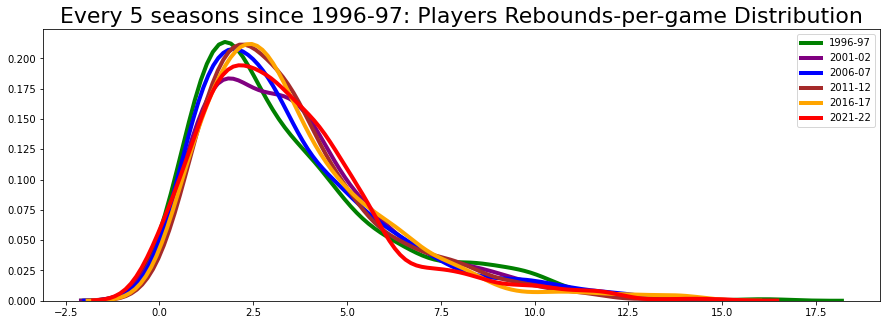

In [18]:
plt.figure(figsize=(15,5))
sns.kdeplot(df[df['season'] == '1996-97']['reb'], color='g', label='1996-97', linewidth=4)
sns.kdeplot(df[df['season'] == '2001-02']['reb'], color='purple', label='2001-02', linewidth= 4)
sns.kdeplot(df[df['season'] == '2006-07']['reb'], color='b', label='2006-07', linewidth= 4)
sns.kdeplot(df[df['season'] == '2011-12']['reb'], color='brown', label='2011-12', linewidth= 4)
sns.kdeplot(df[df['season'] == '2016-17']['reb'], color='orange', label='2016-17', linewidth= 4)
sns.kdeplot(df[df['season'] == '2021-22']['reb'], color='r', label='2021-22', linewidth= 4)

plt.title("Every 5 seasons since 1996-97: Players Rebounds-per-game Distribution", fontsize=22) 
plt.savefig('C:/Users/jason/Python-learning/每隔5季各球員場均籃板比較.png')   
plt.legend()

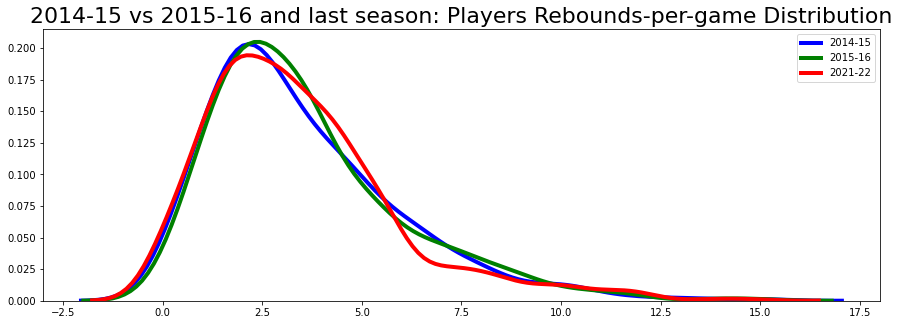

In [26]:
plt.figure(figsize=(15,5))
sns.kdeplot(df[df['season'] == '2014-15']['reb'], color='b', label='2014-15', linewidth=4)
sns.kdeplot(df[df['season'] == '2015-16']['reb'], color='g', label='2015-16', linewidth= 4)
sns.kdeplot(df[df['season'] == '2021-22']['reb'], color='r', label='2021-22', linewidth= 4)

plt.title("2014-15 vs 2015-16 and last season: Players Rebounds-per-game Distribution", fontsize=22) 
plt.savefig('C:/Users/jason/Python-learning/勇士奪冠前後各球員單季場均籃板比較.png')   
plt.legend()

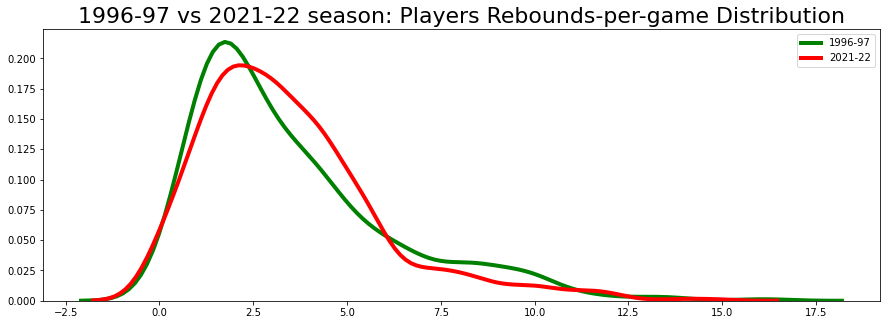

In [13]:
plt.figure(figsize=(15,5))

seasons = list(df['season'].unique())
earliest_season = seasons[0]
latest_season = seasons[-1]

sns.kdeplot(df[df['season'] == earliest_season]['reb'], color='g', label='1996-97', linewidth=4)
sns.kdeplot(df[df['season'] == latest_season]['reb'], color='r', label='2021-22', linewidth= 4)

plt.title("1996-97 vs 2021-22 season: Players Rebounds-per-game Distribution", fontsize=22) 
plt.savefig('C:/Users/jason/Python-learning/單季各球員場均籃板比較.png')   
plt.legend()

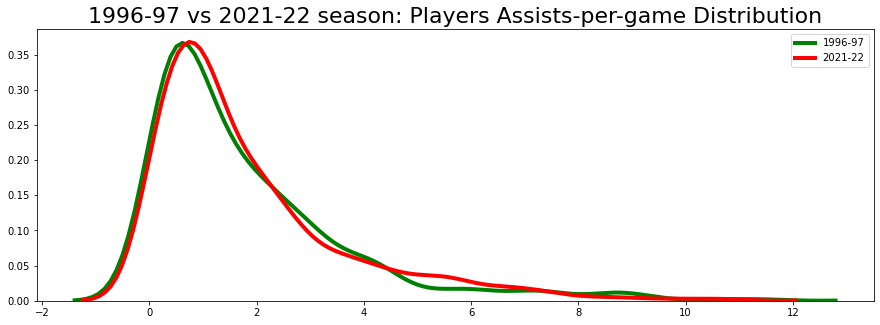

In [85]:
plt.figure(figsize=(15,5))

seasons = list(df['season'].unique())
earliest_season = seasons[0]
latest_season = seasons[-1]

sns.kdeplot(df[df['season'] == earliest_season]['ast'], color='g', label='1996-97', linewidth=4)
sns.kdeplot(df[df['season'] == latest_season]['ast'], color='r', label='2021-22', linewidth= 4)

plt.title("1996-97 vs 2021-22 season: Players Assists-per-game Distribution", fontsize=22)
plt.savefig('C:/Users/jason/Python-learning/單季各球員場均助攻比較.png')       
plt.legend()

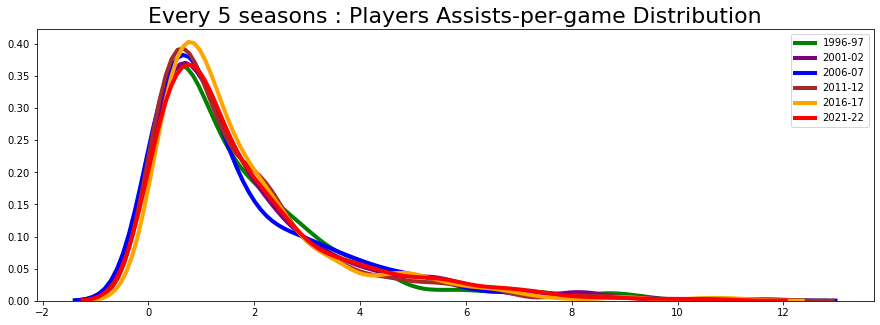

In [28]:
plt.figure(figsize=(15,5))
sns.kdeplot(df[df['season'] == '1996-97']['ast'], color='g', label='1996-97', linewidth=4)
sns.kdeplot(df[df['season'] == '2001-02']['ast'], color='purple', label='2001-02', linewidth= 4)
sns.kdeplot(df[df['season'] == '2006-07']['ast'], color='b', label='2006-07', linewidth= 4)
sns.kdeplot(df[df['season'] == '2011-12']['ast'], color='brown', label='2011-12', linewidth= 4)
sns.kdeplot(df[df['season'] == '2016-17']['ast'], color='orange', label='2016-17', linewidth= 4)
sns.kdeplot(df[df['season'] == '2021-22']['ast'], color='r', label='2021-22', linewidth= 4)
plt.title("Every 5 seasons : Players Assists-per-game Distribution", fontsize=22)
plt.savefig('C:/Users/jason/Python-learning/每隔5季各球員場均助攻比較.png')       
plt.legend()

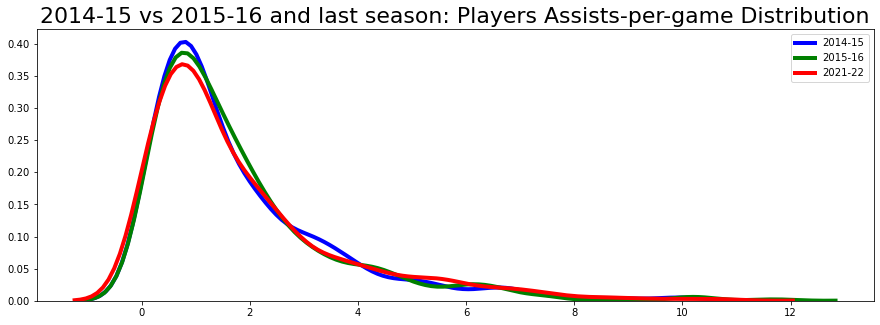

In [29]:
plt.figure(figsize=(15,5))
sns.kdeplot(df[df['season'] == '2014-15']['ast'], color='b', label='2014-15', linewidth=4)
sns.kdeplot(df[df['season'] == '2015-16']['ast'], color='g', label='2015-16', linewidth= 4)
sns.kdeplot(df[df['season'] == '2021-22']['ast'], color='r', label='2021-22', linewidth= 4)
plt.title("2014-15 vs 2015-16 and last season: Players Assists-per-game Distribution", fontsize=22) 
plt.savefig('C:/Users/jason/Python-learning/勇士奪冠前後各球員單季場均助攻比較.png')   
plt.legend()